In [29]:
import pandas as pd
import numpy as np

In [30]:
paths = []
for i in range(2002,2018):
    paths.append("./data/airquality/madrid/madrid_"+str(i)+".csv")

time_df = pd.read_csv("./data/airquality/madrid/madrid_2001.csv")
for path in paths:
    time_df = time_df.append(pd.read_csv(path), ignore_index=True)

In [31]:
time_df.shape

(3739128, 19)

In [4]:
air = time_df.groupby(["date"]).mean().drop(columns="station")

In [5]:
air.isna().sum()

BEN         28
CO          27
EBE         28
MXY      66826
NMHC        27
NO_2        27
NOx      59179
OXY      66826
O_3         27
PM10        58
PXY      66831
SO_2        27
TCH         26
TOL         28
PM25     27266
NO       87654
CH4     146808
dtype: int64

In [6]:
air_sub = air.drop(columns=["CH4","MXY","NO","NOx","OXY","PM25","PXY"])
air_sub.isna().sum()

BEN     28
CO      27
EBE     28
NMHC    27
NO_2    27
O_3     27
PM10    58
SO_2    27
TCH     26
TOL     28
dtype: int64

In [7]:
air_nona = air_sub.dropna()
air_nona.reset_index(inplace = True)
air_nona.head()

,date,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL
0,2001-01-01 01:00:00,3.176667,1.2568,2.560000,0.239,55.287601,7.8292,30.660417,22.1004,1.575,10.584444
1,2001-01-01 02:00:00,7.001111,2.2696,4.711429,0.383,55.848400,7.0744,41.035909,24.0064,1.733,19.410000
2,2001-01-01 03:00:00,9.768889,2.3544,6.628572,0.401,55.720800,6.8332,56.345218,25.4832,1.778,29.270000
3,2001-01-01 04:00:00,9.554444,2.0456,7.222857,0.365,56.596800,7.1856,47.972083,23.6180,1.779,30.757778
4,2001-01-01 05:00:00,7.343333,1.4376,5.522857,0.260,53.827600,7.9592,36.637083,20.0304,1.795,24.490000


In [38]:
air_nona['Dates'] = pd.to_datetime(air_nona['date']).dt.date
air_nona['Time'] = pd.to_datetime(air_nona['date']).dt.time

air_day = air_nona.drop(columns=["date","Time"])
air_day

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL,Dates
0,3.176667,1.2568,2.560000,0.239000,55.287601,7.829200,30.660417,22.1004,1.575000,10.584444,2001-01-01
1,7.001111,2.2696,4.711429,0.383000,55.848400,7.074400,41.035909,24.0064,1.733000,19.410000,2001-01-01
2,9.768889,2.3544,6.628572,0.401000,55.720800,6.833200,56.345218,25.4832,1.778000,29.270000,2001-01-01
3,9.554444,2.0456,7.222857,0.365000,56.596800,7.185600,47.972083,23.6180,1.779000,30.757778,2001-01-01
4,7.343333,1.4376,5.522857,0.260000,53.827600,7.959200,36.637083,20.0304,1.795000,24.490000,2001-01-01
...,...,...,...,...,...,...,...,...,...,...,...
148951,0.316667,0.3000,0.116667,0.030000,28.750000,55.642857,3.083333,4.2000,1.236667,0.433333,2017-12-31
148952,0.383333,0.3200,0.116667,0.036667,32.541667,55.357143,4.083333,4.5000,1.243333,0.550000,2017-12-31
148953,0.416667,0.2900,0.116667,0.043333,24.833333,59.214286,5.416667,4.7000,1.250000,0.566667,2017-12-31
148954,0.350000,0.2500,0.116667,0.036667,15.750000,65.214286,5.916667,4.3000,1.246667,0.466667,2017-12-31


In [39]:
air_day['Dates'] = pd.to_datetime(air_day['Dates'])

In [40]:
air_day.dtypes

BEN             float64
CO              float64
EBE             float64
NMHC            float64
NO_2            float64
O_3             float64
PM10            float64
SO_2            float64
TCH             float64
TOL             float64
Dates    datetime64[ns]
dtype: object

In [41]:
air_day['day'] = air_day['Dates'].dt.day
air_day['month'] = air_day['Dates'].dt.month
air_day['year'] = air_day['Dates'].dt.year

In [42]:
air_day.dtypes

BEN             float64
CO              float64
EBE             float64
NMHC            float64
NO_2            float64
O_3             float64
PM10            float64
SO_2            float64
TCH             float64
TOL             float64
Dates    datetime64[ns]
day               int64
month             int64
year              int64
dtype: object

In [ ]:
df.replace({'A': {0: 100, 4: 400}})

In [46]:
air_day.replace({"month":{1: "01",
                          2:"02",
                          3:"03",
                          4:"04",
                          5:"05",
                          6:"06",
                          7:"07",
                          8:"08",
                          9:"09"}}, inplace = True)

In [47]:
air_day["month"] = air_day["month"].astype("str")
air_day["year"] = air_day["year"].astype("str")

In [48]:
air_day["year-month"] = air_day["year"]+"-"+air_day["month"]
air_day.drop(columns=["day","month","year","Dates"], inplace=True)

In [49]:
air_day

,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL,year-month
0,3.176667,1.2568,2.560000,0.239000,55.287601,7.829200,30.660417,22.1004,1.575000,10.584444,2001-01
1,7.001111,2.2696,4.711429,0.383000,55.848400,7.074400,41.035909,24.0064,1.733000,19.410000,2001-01
2,9.768889,2.3544,6.628572,0.401000,55.720800,6.833200,56.345218,25.4832,1.778000,29.270000,2001-01
3,9.554444,2.0456,7.222857,0.365000,56.596800,7.185600,47.972083,23.6180,1.779000,30.757778,2001-01
4,7.343333,1.4376,5.522857,0.260000,53.827600,7.959200,36.637083,20.0304,1.795000,24.490000,2001-01
...,...,...,...,...,...,...,...,...,...,...,...
148951,0.316667,0.3000,0.116667,0.030000,28.750000,55.642857,3.083333,4.2000,1.236667,0.433333,2017-12
148952,0.383333,0.3200,0.116667,0.036667,32.541667,55.357143,4.083333,4.5000,1.243333,0.550000,2017-12
148953,0.416667,0.2900,0.116667,0.043333,24.833333,59.214286,5.416667,4.7000,1.250000,0.566667,2017-12
148954,0.350000,0.2500,0.116667,0.036667,15.750000,65.214286,5.916667,4.3000,1.246667,0.466667,2017-12


In [50]:
air_months = air_day.groupby("year-month").max().reset_index()

In [52]:
air_months.sort_values(by="year-month", inplace = True)

In [53]:
air_months

,year-month,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL
0,2001-01,21.463333,4.708077,16.710000,0.989000,152.630000,57.977692,139.604583,75.781923,2.637000,62.883333
1,2001-02,19.301111,4.970769,17.485714,1.017778,180.893078,60.036800,175.047827,88.663847,2.461000,62.780000
2,2001-03,16.278889,4.248333,12.220000,0.812857,129.330799,67.168750,130.731304,53.932917,2.504286,50.074444
3,2001-04,16.562000,2.819167,17.093333,0.720000,136.210801,87.918076,121.200870,46.415600,2.484286,56.595556
4,2001-05,14.775555,4.259583,23.788572,1.170000,160.460799,119.768000,107.878333,40.400000,2.435000,56.345556
...,...,...,...,...,...,...,...,...,...,...,...
200,2017-09,4.483333,1.340000,3.616667,0.350000,151.708333,130.642857,47.416667,11.500000,1.823333,25.983334
201,2017-10,8.816667,2.070000,7.516667,0.653333,185.916667,114.071429,61.000000,13.300000,2.150000,49.316667
202,2017-11,5.983333,2.010000,4.216667,0.386667,177.791667,83.384615,69.333333,20.777778,2.376667,33.316666
203,2017-12,4.816667,1.690000,7.016667,0.630000,179.583333,76.285714,66.818182,20.444444,2.733333,26.783334


In [55]:
air_months.to_csv("./data/air_20years.csv")

In [56]:
air_months_mean = air_day.groupby("year-month").mean().reset_index()
air_months_mean.sort_values(by="year-month", inplace = True)
air_months_mean.to_csv("./data/air_20years_mean.csv")

In [57]:
air_months_med = air_day.groupby("year-month").median().reset_index()
air_months_med.sort_values(by="year-month", inplace = True)
air_months_med.to_csv("./data/air_20years_median.csv")

In [59]:
air_2017 = pd.read_csv("./data/airquality/madrid/madrid_2017.csv")

In [62]:
air_2014 = pd.read_csv("./data/airquality/madrid/madrid_2018.csv")

In [60]:
air_2017.shape

(210120, 16)

In [27]:
air_2017.head(25)

,date,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,4.0,38.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,28079004
1,2017-06-01 01:00:00,0.6,NaN,0.3,0.4,0.08,3.0,39.0,NaN,71.0,22.0,9.0,7.0,1.40,2.9,28079008
2,2017-06-01 01:00:00,0.2,NaN,NaN,0.1,NaN,1.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.9,28079011
3,2017-06-01 01:00:00,NaN,NaN,0.2,NaN,NaN,1.0,9.0,NaN,91.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,19.0,NaN,69.0,NaN,NaN,2.0,NaN,NaN,28079017
5,2017-06-01 01:00:00,0.1,NaN,0.3,0.2,NaN,1.0,26.0,NaN,70.0,26.0,NaN,1.0,NaN,0.3,28079018
6,2017-06-01 01:00:00,0.3,NaN,0.2,0.1,0.17,1.0,19.0,NaN,79.0,23.0,9.0,3.0,0.86,1.8,28079024
7,2017-06-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,87.0,NaN,NaN,NaN,NaN,NaN,28079027
8,2017-06-01 01:00:00,NaN,NaN,0.3,NaN,NaN,3.0,30.0,NaN,70.0,NaN,NaN,NaN,NaN,NaN,28079035
9,2017-06-01 01:00:00,NaN,NaN,0.1,NaN,NaN,1.0,15.0,NaN,NaN,22.0,NaN,10.0,NaN,NaN,28079036


In [30]:
air_2017.iloc[:24].describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
count,6.000000,0.0,10.000000,6.000000,3.000000,24.000000,24.000000,0.0,14.000000,12.000000,6.000000,9.000000,3.000000,6.000000,2.400000e+01
mean,0.350000,NaN,0.230000,0.400000,0.110000,1.833333,20.416667,NaN,76.071429,28.583333,10.666667,4.666667,1.140000,1.816667,2.807904e+07
std,0.242899,NaN,0.082327,0.352136,0.051962,1.761093,10.524988,NaN,9.579339,19.965690,2.422120,3.278719,0.270555,1.204021,1.799094e+01
min,0.100000,NaN,0.100000,0.100000,0.080000,1.000000,6.000000,NaN,59.000000,15.000000,9.000000,1.000000,0.860000,0.300000,2.807900e+07
25%,0.200000,NaN,0.200000,0.125000,0.080000,1.000000,12.000000,NaN,70.000000,20.000000,9.000000,2.000000,1.010000,1.050000,2.807902e+07
50%,0.250000,NaN,0.250000,0.300000,0.080000,1.000000,18.000000,NaN,74.500000,22.500000,9.500000,3.000000,1.160000,1.650000,2.807904e+07
75%,0.525000,NaN,0.300000,0.550000,0.125000,2.000000,26.000000,NaN,82.750000,24.500000,11.500000,7.000000,1.280000,2.625000,2.807905e+07
max,0.700000,NaN,0.300000,1.000000,0.170000,9.000000,47.000000,NaN,91.000000,86.000000,15.000000,10.000000,1.400000,3.500000,2.807906e+07


In [13]:
air_2017.dtypes

date        object
BEN        float64
CH4        float64
CO         float64
EBE        float64
NMHC       float64
NO         float64
NO_2       float64
NOx        float64
O_3        float64
PM10       float64
PM25       float64
SO_2       float64
TCH        float64
TOL        float64
station      int64
dtype: object

In [70]:
air_2017.groupby(["date"]).mean().drop(columns="station")

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL
date,,,,,,,,,,,,,,
2017-01-01 01:00:00,1.380000,NaN,0.61,0.150000,0.166667,44.333333,47.541667,NaN,4.846154,25.000000,28.666667,13.8,1.543333,2.740000
2017-01-01 02:00:00,1.520000,NaN,0.63,0.175000,0.190000,65.375000,53.000000,NaN,4.230769,45.666667,47.500000,11.1,1.583333,3.240000
2017-01-01 03:00:00,1.920000,NaN,0.60,0.225000,0.176667,62.208333,52.666667,NaN,4.307692,40.555556,46.666667,9.2,1.590000,3.860000
2017-01-01 04:00:00,1.480000,NaN,0.58,0.200000,0.166667,57.083333,50.125000,NaN,4.769231,32.200000,30.166667,8.7,1.590000,2.980000
2017-01-01 05:00:00,1.320000,NaN,0.48,0.150000,0.160000,41.583333,44.750000,NaN,4.923077,25.454545,24.333333,9.6,1.583333,2.560000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 20:00:00,0.316667,1.210000,0.30,0.116667,0.030000,5.083333,28.750000,36.541667,55.642857,3.083333,2.500000,4.2,1.236667,0.433333
2017-12-31 21:00:00,0.383333,1.210000,0.32,0.116667,0.036667,6.708333,32.541667,42.791667,55.357143,4.083333,2.833333,4.5,1.243333,0.550000
2017-12-31 22:00:00,0.416667,1.206667,0.29,0.116667,0.043333,3.708333,24.833333,30.583333,59.214286,5.416667,2.500000,4.7,1.250000,0.566667


In [32]:
air_2017_hour = air_2017.groupby(["date"]).mean().drop(columns="station")

In [42]:
air_2017_hour.shape

(8760, 12)

In [41]:
air_2017_hour.isna().sum()

BEN     1
CO      1
EBE     1
NMHC    1
NO      1
NO_2    1
O_3     1
PM10    1
PM25    1
SO_2    1
TCH     1
TOL     1
dtype: int64

In [39]:
air_2017_hour.drop(columns= ["CH4", "NOx"], inplace = True)

In [48]:
air_2017_hour.loc[air_2017_hour["BEN"].isna()]

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL
date,,,,,,,,,,,,
2017-03-26 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
air_2017_hour.drop("2017-03-26 03:00:00", inplace = True)

In [52]:
air_2017_hour.head()

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL
date,,,,,,,,,,,,
2017-01-01 01:00:00,1.38,0.61,0.150,0.166667,44.333333,47.541667,4.846154,25.000000,28.666667,13.8,1.543333,2.74
2017-01-01 02:00:00,1.52,0.63,0.175,0.190000,65.375000,53.000000,4.230769,45.666667,47.500000,11.1,1.583333,3.24
2017-01-01 03:00:00,1.92,0.60,0.225,0.176667,62.208333,52.666667,4.307692,40.555556,46.666667,9.2,1.590000,3.86
2017-01-01 04:00:00,1.48,0.58,0.200,0.166667,57.083333,50.125000,4.769231,32.200000,30.166667,8.7,1.590000,2.98
2017-01-01 05:00:00,1.32,0.48,0.150,0.160000,41.583333,44.750000,4.923077,25.454545,24.333333,9.6,1.583333,2.56


In [72]:
air_2016 = pd.read_csv("./data/airquality/madrid/madrid_2016.csv")

In [73]:
air_2016.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2016-11-01 01:00:00,NaN,0.7,NaN,NaN,153.0,77.0,NaN,NaN,NaN,7.0,NaN,NaN,28079004
1,2016-11-01 01:00:00,3.1,1.1,2.0,0.53,260.0,144.0,4.0,46.0,24.0,18.0,2.44,14.4,28079008
2,2016-11-01 01:00:00,5.9,NaN,7.5,NaN,297.0,139.0,NaN,NaN,NaN,NaN,NaN,26.0,28079011
3,2016-11-01 01:00:00,NaN,1.0,NaN,NaN,154.0,113.0,2.0,NaN,NaN,NaN,NaN,NaN,28079016
4,2016-11-01 01:00:00,NaN,NaN,NaN,NaN,275.0,127.0,2.0,NaN,NaN,18.0,NaN,NaN,28079017


In [74]:
air_2016.dtypes

date        object
BEN        float64
CO         float64
EBE        float64
NMHC       float64
NO         float64
NO_2       float64
O_3        float64
PM10       float64
PM25       float64
SO_2       float64
TCH        float64
TOL        float64
station      int64
dtype: object

In [75]:
air_2016.groupby(["date"]).mean().drop(columns="station")

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL
date,,,,,,,,,,,,
2016-01-01 01:00:00,0.933333,0.46,0.216667,0.090000,23.458333,47.750000,10.357143,20.200000,13.166667,9.1,1.550000,2.483333
2016-01-01 02:00:00,1.266667,0.51,0.283333,0.110000,36.208333,53.500000,8.428571,36.700000,24.833333,9.2,1.633333,3.116667
2016-01-01 03:00:00,1.033333,0.49,0.216667,0.110000,34.916667,53.875000,7.785714,35.545455,30.833333,8.9,1.596667,2.883333
2016-01-01 04:00:00,1.050000,0.42,0.200000,0.093333,23.791667,50.958333,8.642857,31.666667,30.333333,8.9,1.530000,2.583333
2016-01-01 05:00:00,1.066667,0.39,0.250000,0.100000,19.500000,49.000000,9.928571,27.250000,24.666667,8.6,1.506667,2.933333
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 20:00:00,1.620000,0.76,0.250000,0.176667,80.875000,77.375000,3.692308,31.700000,29.166667,15.9,1.520000,3.880000
2016-12-31 21:00:00,1.760000,0.78,0.225000,0.190000,93.666667,78.958333,3.769231,30.500000,25.833333,14.6,1.546667,4.340000
2016-12-31 22:00:00,1.940000,0.83,0.225000,0.206667,107.500000,80.458333,3.461538,33.000000,26.333333,14.1,1.563333,4.520000


In [76]:
air_2015 = pd.read_csv("./data/airquality/madrid/madrid_2015.csv")

In [77]:
air_2015.groupby(["date"]).mean().drop(columns="station")

,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL
date,,,,,,,,,,,,
2015-01-01 01:00:00,2.800000,1.11,1.620000,0.810000,179.458333,105.666667,4.357143,55.555556,39.333333,17.3,2.450000,8.200000
2015-01-01 02:00:00,3.440000,1.58,2.040000,0.833333,253.958333,128.791667,4.500000,72.400000,60.333333,20.7,2.423333,10.080000
2015-01-01 03:00:00,3.560000,1.50,2.340000,0.833333,252.166667,126.083333,4.142857,71.916667,57.666667,18.8,2.416667,10.940000
2015-01-01 04:00:00,3.200000,1.18,2.120000,0.790000,214.583333,111.958333,4.000000,69.916667,49.333333,15.6,2.356667,9.640000
2015-01-01 05:00:00,2.960000,1.26,1.660000,0.750000,208.375000,105.291667,3.857143,65.666667,45.000000,13.5,2.300000,8.540000
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 20:00:00,0.783333,0.42,0.216667,0.093333,26.041667,58.791667,11.428571,14.666667,7.666667,8.0,1.286667,2.650000
2015-12-31 21:00:00,1.016667,0.44,0.333333,0.110000,33.875000,65.708333,9.071429,15.333333,7.833333,8.4,1.310000,3.250000
2015-12-31 22:00:00,1.100000,0.46,0.316667,0.110000,33.958333,67.875000,7.357143,16.583333,9.666667,8.7,1.303333,3.183333


In [85]:
air = pd.read_csv("./data/airquality/madrid/madrid_2011.csv")
air_hour = air.groupby(["date"]).mean().drop(columns="station")
air_hour.isna().sum()

BEN     0
CO      0
EBE     0
NMHC    0
NO      0
NO_2    0
O_3     0
PM10    0
PM25    0
SO_2    0
TCH     0
TOL     0
dtype: int64

In [86]:
air_01 = pd.read_csv("./data/airquality/madrid/madrid_2001.csv")
air_02 = pd.read_csv("./data/airquality/madrid/madrid_2002.csv")
air_03 = pd.read_csv("./data/airquality/madrid/madrid_2003.csv")
air_04 = pd.read_csv("./data/airquality/madrid/madrid_2004.csv")
air_05 = pd.read_csv("./data/airquality/madrid/madrid_2005.csv")
air_06 = pd.read_csv("./data/airquality/madrid/madrid_2006.csv")
air_07 = pd.read_csv("./data/airquality/madrid/madrid_2007.csv")
air_08 = pd.read_csv("./data/airquality/madrid/madrid_2008.csv")
air_09 = pd.read_csv("./data/airquality/madrid/madrid_2009.csv")
air_10 = pd.read_csv("./data/airquality/madrid/madrid_2010.csv")
air_11 = pd.read_csv("./data/airquality/madrid/madrid_2011.csv")
air_12 = pd.read_csv("./data/airquality/madrid/madrid_2012.csv")
air_13 = pd.read_csv("./data/airquality/madrid/madrid_2013.csv")
air_14 = pd.read_csv("./data/airquality/madrid/madrid_2014.csv")
air_15 = pd.read_csv("./data/airquality/madrid/madrid_2015.csv")
air_16 = pd.read_csv("./data/airquality/madrid/madrid_2016.csv")
air_17 = pd.read_csv("./data/airquality/madrid/madrid_2017.csv")


In [96]:
paths = []
for i in range(2002,2018):
    paths.append("./data/airquality/madrid/madrid_"+str(i)+".csv")

In [100]:
time_df = pd.read_csv("./data/airquality/madrid/madrid_2001.csv")
for path in paths:
    time_df = time_df.append(pd.read_csv(path), ignore_index=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [101]:
time_df.shape

(3739128, 19)

In [103]:
air = time_df.groupby(["date"]).mean().drop(columns="station")

In [104]:
air.isna().sum()

BEN         28
CH4     146808
CO          27
EBE         28
MXY      66826
NMHC        27
NO       87654
NO_2        27
NOx      59179
OXY      66826
O_3         27
PM10        58
PM25     27266
PXY      66831
SO_2        27
TCH         26
TOL         28
dtype: int64

In [107]:
air_sub = air.drop(columns=["CH4","MXY","NO","NOx","OXY","PM25","PXY"])

In [109]:
air_sub.isna().sum()

BEN     28
CO      27
EBE     28
NMHC    27
NO_2    27
O_3     27
PM10    58
SO_2    27
TCH     26
TOL     28
dtype: int64

In [112]:
air_nona = air_sub.dropna()

In [115]:
air_nona.head()

,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL
date,,,,,,,,,,
2001-01-01 01:00:00,3.176667,1.2568,2.560000,0.239,55.287601,7.8292,30.660417,22.1004,1.575,10.584444
2001-01-01 02:00:00,7.001111,2.2696,4.711429,0.383,55.848400,7.0744,41.035909,24.0064,1.733,19.410000
2001-01-01 03:00:00,9.768889,2.3544,6.628572,0.401,55.720800,6.8332,56.345218,25.4832,1.778,29.270000
2001-01-01 04:00:00,9.554444,2.0456,7.222857,0.365,56.596800,7.1856,47.972083,23.6180,1.779,30.757778
2001-01-01 05:00:00,7.343333,1.4376,5.522857,0.260,53.827600,7.9592,36.637083,20.0304,1.795,24.490000


In [119]:
air_nona.reset_index(inplace = True)

In [130]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
air_nona.head()

,date,BEN,CO,EBE,NMHC,NO_2,O_3,PM10,SO_2,TCH,TOL
0,2001-01-01 01:00:00,3.176667,1.2568,2.560000,0.239,55.287601,7.8292,30.660417,22.1004,1.575,10.584444
1,2001-01-01 02:00:00,7.001111,2.2696,4.711429,0.383,55.848400,7.0744,41.035909,24.0064,1.733,19.410000
2,2001-01-01 03:00:00,9.768889,2.3544,6.628572,0.401,55.720800,6.8332,56.345218,25.4832,1.778,29.270000
3,2001-01-01 04:00:00,9.554444,2.0456,7.222857,0.365,56.596800,7.1856,47.972083,23.6180,1.779,30.757778
4,2001-01-01 05:00:00,7.343333,1.4376,5.522857,0.260,53.827600,7.9592,36.637083,20.0304,1.795,24.490000


In [149]:
air_nona['Dates'] = pd.to_datetime(air_nona['date']).dt.date
air_nona['Time'] = pd.to_datetime(air_nona['date']).dt.time

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [152]:
air_day = air_nona.drop(columns=["date","Time"])

In [154]:
air_day = air_day.groupby("Dates").mean()

In [156]:
air_day.reset_index(inplace=True)

In [157]:
air_day.columns

Index(['Dates', 'BEN', 'CO', 'EBE', 'NMHC', 'NO_2', 'O_3', 'PM10', 'SO_2',
       'TCH', 'TOL'],
      dtype='object')

In [215]:
df_10year = df.iloc[3287:]

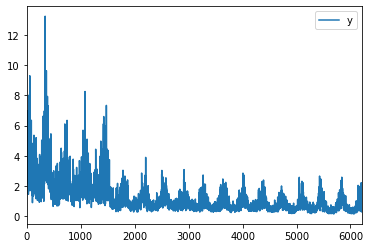

In [216]:
df = air_day[["Dates","BEN"]]
df.columns = ["ds","y"]
df.plot()

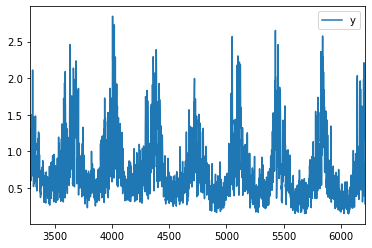

In [217]:
df_10year.plot()

In [218]:
df_10year.head()

,ds,y
3287,2010-01-01,0.485625
3288,2010-01-02,0.805942
3289,2010-01-03,1.319226
3290,2010-01-04,1.125139
3291,2010-01-05,0.812609


In [219]:
df_10year['ds'] = pd.to_datetime(df_10year['ds'], errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [220]:
df_10year['day'] = df_10year['ds'].dt.day
df_10year['month'] = df_10year['ds'].dt.month
df_10year['year'] = df_10year['ds'].dt.year

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [221]:
df_10year.head()

,ds,y,day,month,year
3287,2010-01-01,0.485625,1,1,2010
3288,2010-01-02,0.805942,2,1,2010
3289,2010-01-03,1.319226,3,1,2010
3290,2010-01-04,1.125139,4,1,2010
3291,2010-01-05,0.812609,5,1,2010


In [222]:
df_10year.dtypes

ds       datetime64[ns]
y               float64
day               int64
month             int64
year              int64
dtype: object

In [223]:
df_10year.drop(columns="year-month")

KeyError: "['year-month'] not found in axis"

In [224]:
df_10year["month"] = df_10year["month"].astype("str")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
df_10year["year"] = df_10year["year"].astype("str")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
df_10year.drop(columns="year-month",inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A  B   C   D


In [226]:
df_10year.head()

,ds,y,day,month,year
3287,2010-01-01,0.485625,1,1,2010
3288,2010-01-02,0.805942,2,1,2010
3289,2010-01-03,1.319226,3,1,2010
3290,2010-01-04,1.125139,4,1,2010
3291,2010-01-05,0.812609,5,1,2010


In [227]:
df_10year["year-month"] = df_10year["year"]+"-"+df_10year["month"]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [228]:
df_10year.head()

,ds,y,day,month,year,year-month
3287,2010-01-01,0.485625,1,1,2010,2010-1
3288,2010-01-02,0.805942,2,1,2010,2010-1
3289,2010-01-03,1.319226,3,1,2010,2010-1
3290,2010-01-04,1.125139,4,1,2010,2010-1
3291,2010-01-05,0.812609,5,1,2010,2010-1


In [229]:
df_10year.drop(columns=["ds","day","month","year"],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A  B   C   D


In [230]:
df_10year

,y,year-month
3287,0.485625,2010-1
3288,0.805942,2010-1
3289,1.319226,2010-1
3290,1.125139,2010-1
3291,0.812609,2010-1
...,...,...
6205,0.460833,2017-12
6206,0.458333,2017-12
6207,0.461111,2017-12
6208,0.562500,2017-12


In [231]:
df_months = df_10year.groupby("year-month").max().reset_index()

In [232]:
df_months.head()

,year-month,y
0,2010-1,2.111438
1,2010-10,1.938571
2,2010-11,2.091012
3,2010-12,2.459821
4,2010-2,1.483333


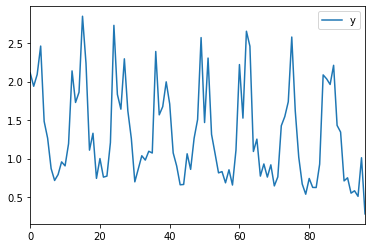

In [236]:
df_months.plot()

In [239]:
df_months_1 = df_months.set_index("year-month")

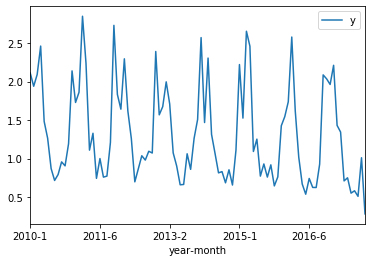

In [240]:
df_months_1.plot()

In [242]:
air_day.columns

Index(['Dates', 'BEN', 'CO', 'EBE', 'NMHC', 'NO_2', 'O_3', 'PM10', 'SO_2',
       'TCH', 'TOL'],
      dtype='object')

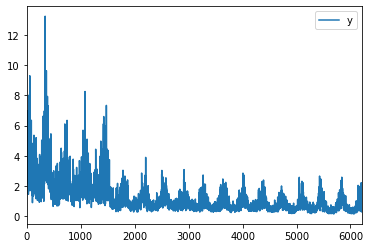

In [241]:
df = air_day[["Dates","BEN"]]
df.columns = ["ds","y"]
df.plot()

In [243]:
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [244]:
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [245]:
df["month"] = df["month"].astype("str")
df["year"] = df["year"].astype("str")
df["year-month"] = df["year"]+"-"+df["month"]
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,ds,y,day,month,year,year-month
0,2001-01-01,3.869746,1,1,2001,2001-1
1,2001-01-02,2.457269,2,1,2001,2001-1
2,2001-01-03,3.110625,3,1,2001,2001-1
3,2001-01-04,2.922645,4,1,2001,2001-1
4,2001-01-05,5.106186,5,1,2001,2001-1


In [246]:
df.drop(columns=["ds","day","month","year"],inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A  B   C   D


In [247]:
df_months_1 = df.set_index("year-month")
df_months_1.plot()

,y,year-month
0,3.869746,2001-1
1,2.457269,2001-1
2,3.110625,2001-1
3,2.922645,2001-1
4,5.106186,2001-1


In [250]:
df_months_1.head()

,y
year-month,
2001-1,3.869746
2001-1,2.457269
2001-1,3.110625
2001-1,2.922645
2001-1,5.106186


In [251]:
air_day.columns

Index(['Dates', 'BEN', 'CO', 'EBE', 'NMHC', 'NO_2', 'O_3', 'PM10', 'SO_2',
       'TCH', 'TOL'],
      dtype='object')

In [263]:
df = air_day[["Dates","BEN"]]
df.columns = ["ds","y"]
df['ds'] = pd.to_datetime(df['ds'], errors='coerce')
df['day'] = df['ds'].dt.day
df['month'] = df['ds'].dt.month
df['year'] = df['ds'].dt.year
df["month"] = df["month"].astype("str")
df["year"] = df["year"].astype("str")
df["year-month"] = df["year"]+"-"+df["month"]
df.drop(columns=["ds","day","month","year"],inplace=True)
df = df.groupby("year-month").mean()
df

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,y
year-month,
2001-1,4.288051
2001-10,2.992107
2001-11,3.712133
2001-12,5.954456
2001-2,4.388892
...,...
2017-6,0.324806
2017-7,0.334091
2017-8,0.293300


In [261]:
df.head().groupby("year-month")

In [255]:
df = df.groupby("year-month").mean()
df_months_1 = df.set_index("year-month")
df_months_1.plot()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

KeyError: "None of ['year-month'] are in the columns"

In [253]:
df_months_1

,y
year-month,
2001-1,3.869746
2001-1,2.457269
2001-1,3.110625
2001-1,2.922645
2001-1,5.106186
...,...
2017-12,0.460833
2017-12,0.458333
2017-12,0.461111


In [262]:
df_months_1.reset_index()

,year-month,y
0,2001-1,3.869746
1,2001-1,2.457269
2,2001-1,3.110625
3,2001-1,2.922645
4,2001-1,5.106186
...,...,...
6205,2017-12,0.460833
6206,2017-12,0.458333
6207,2017-12,0.461111
6208,2017-12,0.562500


# --

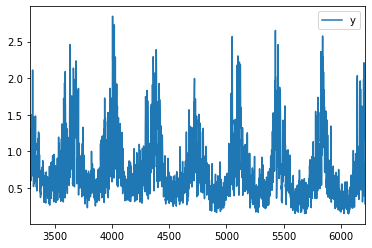

In [205]:
df_10year.plot()

In [132]:
CO = air_nona[["date","CO"]]

In [133]:
CO.columns = ["ds","y"]

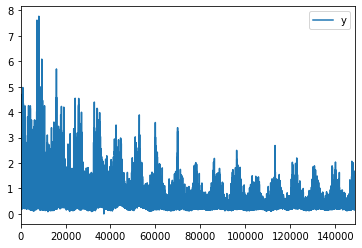

In [134]:
CO.plot()

In [137]:
CO.isna().sum()

ds    0
y     0
dtype: int64

In [138]:
CO.head()

,ds,y
0,2001-01-01 01:00:00,1.2568
1,2001-01-01 02:00:00,2.2696
2,2001-01-01 03:00:00,2.3544
3,2001-01-01 04:00:00,2.0456
4,2001-01-01 05:00:00,1.4376


In [140]:
CO.tail()

,ds,y
148951,2017-12-31 20:00:00,0.30
148952,2017-12-31 21:00:00,0.32
148953,2017-12-31 22:00:00,0.29
148954,2017-12-31 23:00:00,0.25
148955,2018-01-01 00:00:00,0.23


In [141]:
model=Prophet()
model.fit(CO)

SystemError: <class 'stanfit4anon_model_dfdaf2b8ece8a02eb11f050ec701c0ec_5301434531105477895.PyStanHolder'> returned a result with an error set